<a href="https://colab.research.google.com/github/DianaGRM/MineriaDeDatos/blob/main/EjercicioTecnicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diana Gabriela Ramírez Moreno 1941564**

Grupo 001- Lunes 7:00-10:00 PM

# **Árbol de decisión**

In [1]:


import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
BASE = pd.read_csv("student-mat.csv")

In [3]:

nb = BASE.drop(columns=["school","address","Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","schoolsup","famsup","paid","activities","nursery","higher","internet"]) 

In [5]:
nb.rename(columns = {"sex": "Sexo","age": "Edad","famsize": "Fam","Pstatus": "Estatus_padres",
                     "failures": "Reprobadas","higher": "Universidad","higher": "Universidad",
                     "famrel": "Famrel","studytime": "Tiempo_estudio","activities": "Extracurriculares",
                     "freetime": "Tiempo_libre","goout": "Salir","Walc": "Falc","absences": "Faltas","romantic":"Relación"},inplace=True)

In [54]:
nb

,Sexo,Edad,Fam,Estatus_padres,Tiempo_estudio,Reprobadas,Relación,Famrel,Tiempo_libre,Salir,Dalc,Falc,health,Faltas,G1,G2,G3,SexoEncoded,RelaciónEncoded,Estatus_padresEncoded,EdadEncoded,G1Encoded,G2Encoded,G3Encoded,FalcEncoded,DalcEncoded,FamrelEncoded
0,F,18,GT3,A,2,0,no,4,3,4,1,1,3,6,5,6,6,0,0,0,2.0,0.0,1.0,1.0,1.0,1.0,3.0
1,F,17,GT3,T,2,0,no,5,3,3,1,1,3,4,5,5,6,0,0,1,2.0,0.0,0.0,1.0,1.0,1.0,3.0
2,F,15,LE3,T,2,3,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1.0,1.0,1.0,1.0,2.0,1.0,3.0
3,F,15,GT3,T,3,0,yes,3,2,2,1,1,5,2,15,14,15,0,1,1,1.0,2.0,2.0,2.0,1.0,1.0,2.0
4,F,16,GT3,T,2,0,no,4,3,2,1,2,5,4,6,10,10,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,A,2,2,no,5,5,4,4,5,4,11,9,9,9,1,0,0,3.0,1.0,1.0,1.0,3.0,3.0,3.0
391,M,17,LE3,T,1,0,no,2,4,5,3,4,2,3,14,16,16,1,0,1,2.0,2.0,4.0,4.0,3.0,2.0,1.0
392,M,21,GT3,T,1,3,no,5,5,3,3,3,3,3,10,8,7,1,0,1,NaN,1.0,1.0,1.0,2.0,2.0,3.0
393,M,18,LE3,T,1,0,no,4,4,1,3,4,5,0,11,12,10,1,0,1,2.0,2.0,2.0,1.0,3.0,2.0,3.0


In [26]:
nb= nb.fillna(0)

A continuación ransformare los datos de entrada en valores categoricos para hacer el mapa mental 

In [55]:
#Sexo Maping
nb['SexoEncoded']=nb['Sexo'].map({'M':1,'F':0,'':0}).astype(int)


In [95]:
#Mood maping 

#En una relación
nb['RelaciónEncoded']=nb['Relación'].map({'yes':1,'no':0,'':0}).astype(int)

#Estatus de convivencia de los padres 
nb['Estatus_padresEncoded']=nb['Estatus_padres'].map({'T':1,'A':0,'':0}).astype(int)

#Edades por grupos 
nb.loc[nb['Edad']<=16,'EdadEncoded']=1
nb.loc[(nb['Edad']>=17)&(nb['Edad']<=18),'EdadEncoded']=2
nb.loc[(nb['Edad']>=19)&(nb['Edad']<=20),'EdadEncoded']=3
nb.loc[(nb['Edad']>=21)&(nb['Edad']<=22),'EdadEncoded']=4

#Calificaciones Agrupadas del G1, G2 y G3 
#G1
nb.loc[nb['G1']<=5,'G1Encoded']=0
nb.loc[(nb['G1']>=6)&(nb['G1']<=10),'G1Encoded']=1
nb.loc[(nb['G1']>=11)&(nb['G1']<=15),'G1Encoded']=2
nb.loc[(nb['G1']>=16)&(nb['G1']<=20),'G1Encoded']=4
#G2
nb.loc[nb['G2']<=5,'G2Encoded']=0
nb.loc[(nb['G2']>=6)&(nb['G2']<=10),'G2Encoded']=1
nb.loc[(nb['G2']>=11)&(nb['G2']<=15),'G2Encoded']=2
nb.loc[(nb['G2']>=16)&(nb['G2']<=20),'G2Encoded']=4
#G3
nb.loc[nb['G3']<=5,'G3Encoded']=0
nb.loc[(nb['G3']>=6)&(nb['G3']<=10),'G3Encoded']=1
nb.loc[(nb['G3']>=11)&(nb['G3']<=15),'G3Encoded']=2
nb.loc[(nb['G3']>=16)&(nb['G3']<=20),'G3Encoded']=4

#Agrupar datos de consumo de alcohol entre semana y fin de semana 
#Fin de semana 
nb.loc[nb['Falc']<=2,'FalcEncoded']=0
nb.loc[(nb['Falc']>=3)&(nb['Falc']<=5),'FalcEncoded']=1
#entre semana 
nb.loc[nb['Dalc']<=2,'DalcEncoded']=0
nb.loc[(nb['Dalc']>=3)&(nb['Dalc']<=5),'DalcEncoded']=1

#Relación familiar, datos agrupados
nb.loc[nb['Famrel']<=2,'FamrelEncoded']=1
nb.loc[(nb['Famrel']==3),'FamrelEncoded']=2
nb.loc[(nb['Famrel']>=4)&(nb['Famrel']<=5),'FamrelEncoded']=3

#tiempo de estudio 
nb.loc[nb['Tiempo_estudio']<=2,'Tiempo_estudioEncoded']=1
nb.loc[(nb['Tiempo_estudio']==3),'Tiempo_estudio']=2
nb.loc[(nb['Tiempo_estudio']>=4)&(nb['Tiempo_estudio']<=5),'Tiempo_estudio']=3



En este caso tomare como base para el arbol, la columna de FalcEncoded que muestra el consumo de alcohol en fin de semana que tienen los alumnos separados en dos grupos 1 y 0, en el grupo 0 estan los alumnos que consumen muy poco alcohol entonces los tomare como de menor riesgo de volverse alcoholicos y en el grupo 0 estan los alumnos que tienen un consumo de alcohol elevado 

Ya una vez agrupados todos los datos de concidero importantes, procedere a eliminar las columnas que no necesitare con la funcion drop. 

Tendre un nuevo conjunto de datos al que llamaré Hombres_Encoded

In [96]:
drop_elements = ['Sexo','Edad','Fam', 'Estatus_padres', 'Tiempo_estudio',	'Reprobadas',	'Relación',	'Famrel',	'Tiempo_libre',	'Salir',	'Dalc',	'Falc',	'health',	'Faltas',	'G1',	'G2',	'G3']
nb_encoded = nb.drop(drop_elements, axis=1)


Analizaré como quedaron los datos mapeados, así como algunas de las estadisticas descriptivas de algunas de las columnas mas impornates.

In [99]:
nb_encoded

,SexoEncoded,RelaciónEncoded,Estatus_padresEncoded,EdadEncoded,G1Encoded,G2Encoded,G3Encoded,FalcEncoded,DalcEncoded,FamrelEncoded,Tiempo_estudioEncoded
0,0,0,0,2.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
1,0,0,1,2.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
2,0,0,1,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0
3,0,1,1,1.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0
4,0,0,1,1.0,1.0,1.0,1.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
391,1,0,1,2.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0
392,1,0,1,4.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
393,1,0,1,2.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0


In [100]:
nb_encoded= nb_encoded.fillna(0)

In [101]:
nb_encoded[['EdadEncoded', 'FalcEncoded']].groupby(['EdadEncoded'], as_index=False).agg(['mean', 'count', 'sum'])


FalcEncoded            
                   mean count   sum
EdadEncoded                        
1.0            0.338710   186  63.0
2.0            0.472222   180  85.0
3.0            0.333333    27   9.0
4.0            1.000000     2   2.0

Aquí se puede ver que la mayoria de los alumnos que consumen elevadas candidades de alcohol se encuentran en el grupo de edad 2 

In [102]:
nb_encoded[['SexoEncoded', 'FalcEncoded']].groupby(['SexoEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

FalcEncoded            
                   mean count   sum
SexoEncoded                        
0              0.302885   208  63.0
1              0.513369   187  96.0

En este caso, las mujeres estan representadas con o y los hombres con 1, se puede observar como hay menos mujeres que consumen alchol en cantidades elevadas que los hombres. 

In [103]:
nb_encoded[['FamrelEncoded', 'FalcEncoded']].groupby(['FamrelEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

FalcEncoded             
                     mean count    sum
FamrelEncoded                         
1.0              0.461538    26   12.0
2.0              0.470588    68   32.0
3.0              0.382060   301  115.0

Esta tabla nos indica que la mayoria de los alumnos mantienen una relación familiar buena.

In [107]:
nb_encoded[['Tiempo_estudioEncoded', 'FalcEncoded']].groupby(['Tiempo_estudioEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

FalcEncoded             
                             mean count    sum
Tiempo_estudioEncoded                         
0.0                      0.222222    27    6.0
1.0                      0.415761   368  153.0

Como no aparecen las otras categorias, esto indica que la mayoria de los alumnos no invierten el suficiente tiempo para estudiar en la semana 

In [104]:
nb_encoded[['G1Encoded', 'FalcEncoded']].groupby(['G1Encoded'], as_index=False).agg(['mean', 'count', 'sum'])

FalcEncoded            
                 mean count   sum
G1Encoded                        
0.0          0.333333     9   3.0
1.0          0.472826   184  87.0
2.0          0.347826   161  56.0
4.0          0.317073    41  13.0

***Creación del arbol***

In [105]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(nb_encoded))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:1.4})
    for train_fold, valid_fold in cv.split(nb_encoded):
        f_train = nb_encoded.loc[train_fold] 
        f_valid = nb_encoded.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['FalcEncoded'], axis=1), 
                               y = f_train["FalcEncoded"]) 
        valid_acc = model.score(X = f_valid.drop(['FalcEncoded'], axis=1), 
                                y = f_valid["FalcEncoded"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.698526
         2          0.541538
         3          0.655705
         4          0.647564
         5          0.655385
         6          0.614679
         7          0.617244
         8          0.630064
         9          0.625064
        10          0.620064
        11          0.622564


Se puede ver que en 5 niveles de splits se tiene el score más alto, con casi 65% 

Ahora ya sólo queda crear y visualizar el árbol de 5 niveles de profundidad.

***Visualización del arbol***

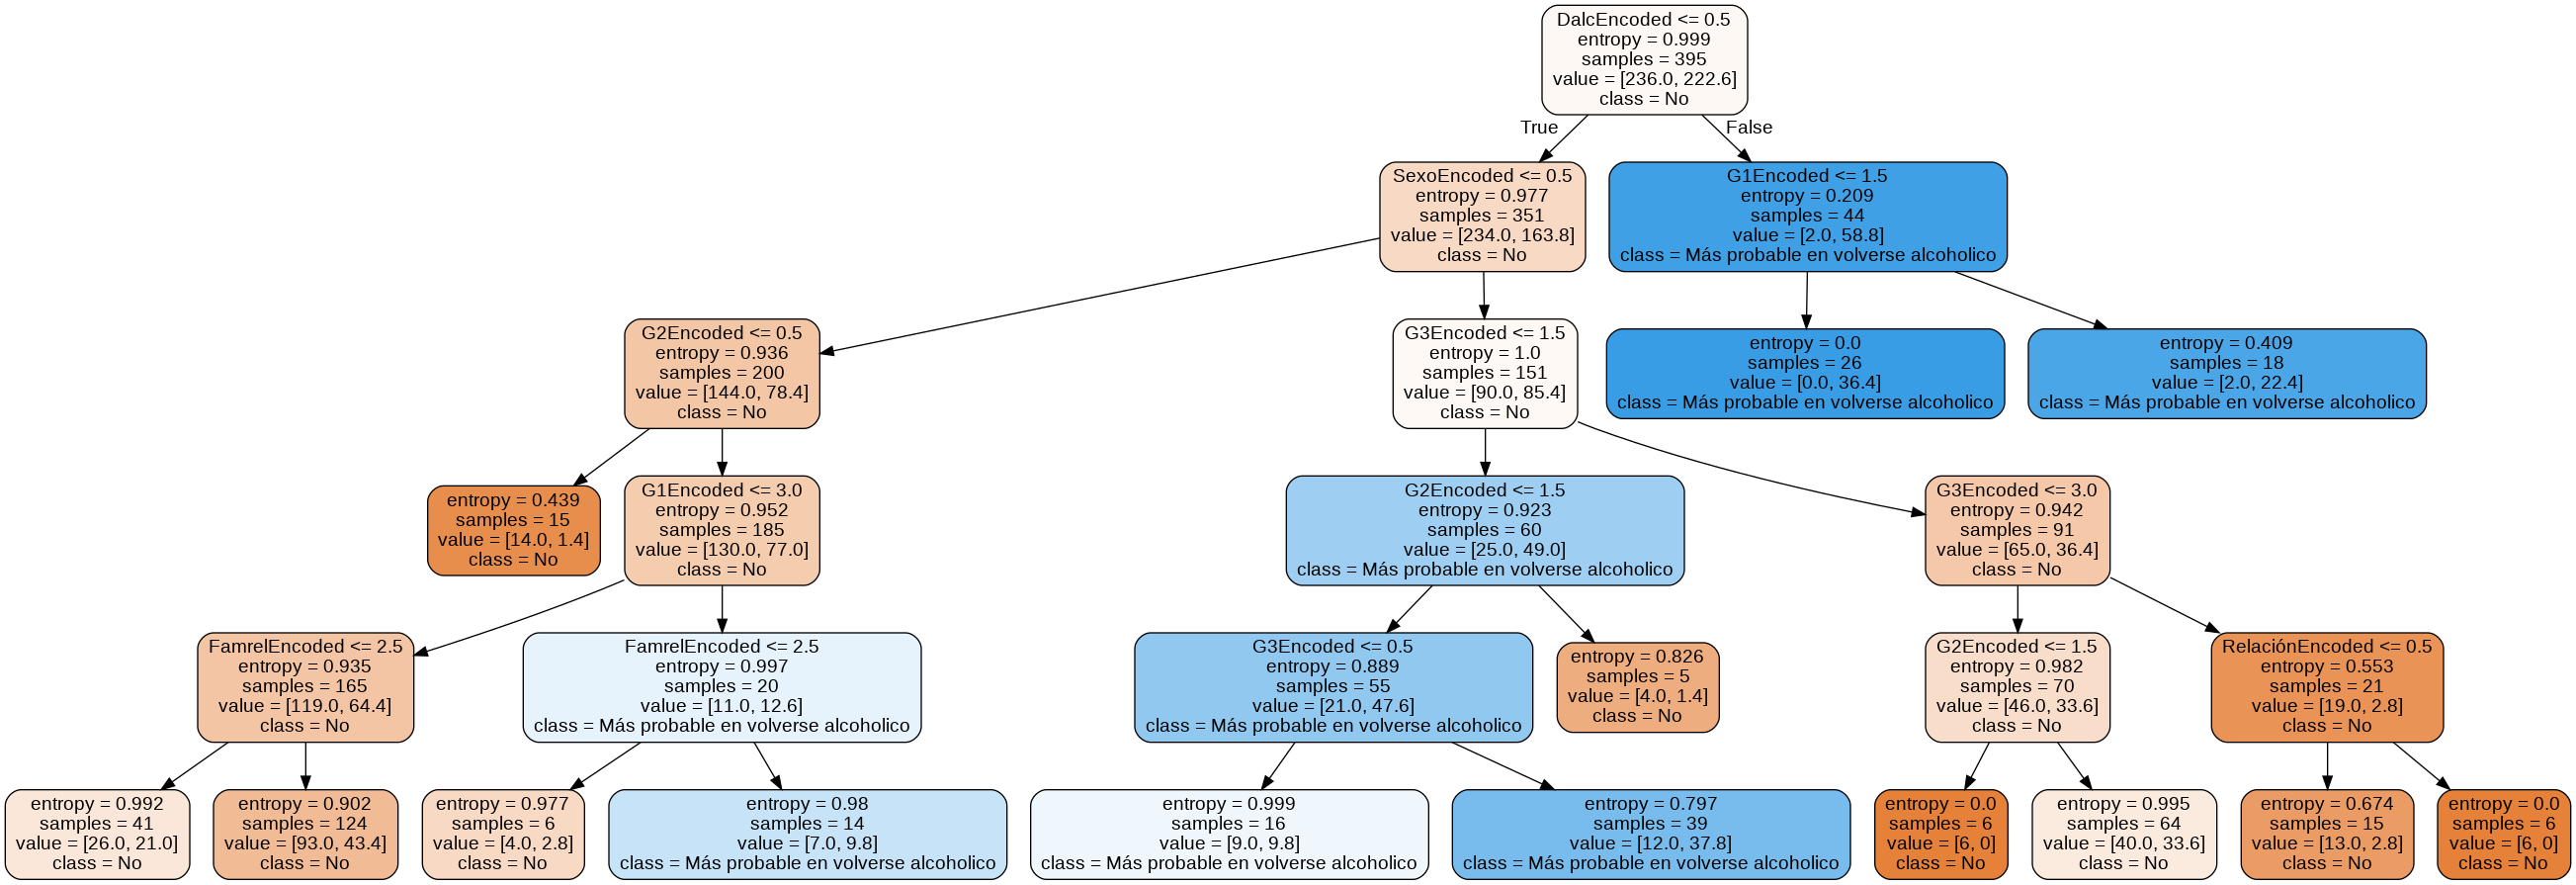

In [108]:
# Crear arrays de entrenamiento y las etiquetas que indican si es Hombre o no 
y_train = nb_encoded['FalcEncoded']
x_train = nb_encoded.drop(['FalcEncoded'], axis=1).values 

# Crear Arbol de decision con profundidad = 5
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 5,
                                            class_weight={1:1.4})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(nb_encoded.drop(['FalcEncoded'], axis=1)),
                              class_names = ['No', 'Más probable en volverse alcoholico'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

***Análisis***

En la gráfica vemos, un nodo raíz que hace una primer subdivisión por cantidad de alcohol consumida entre semana y las salidas van a izquierda por True que sea menor a 0.5, es decir los Sexos: Mujer = 0, Hombre = 1 y a derecha en False van las calificaciones del 1 periodo  que la mayoría están en el grupo 1 que son calificaciones reprobatorias.

En el segundo nivel vemos que la cantidad de muestras (samples) queda repartida en 351 y 44 respectivamente.
A medida que bajamos de nivel veremos que los valores de entropía se aproximan más a 1, cuando el nodo tiene más muestras FalcEncoded=1 (azul) y se acercan a 0 cuando hay mayoría de muestras de FalcEncoded =0 (naranja).


# **Conclusión**

Anteriormente en el segundo avance del PIA en las gráficas, analice algunas características de la base de datos que a mi parecer eran importantes para cumplir con mi objetivo. Tomando esto en cuenta proseguí a realizar el árbol de decisión con dichas categorías y este me arrojo resultados bastante interesantes que si me ayudaron a poder lograr mi objetivo que en pocas palabras es ver qué tipo de alumno podría consumir alcohol en cantidades no adecuadas los fines de semana con sus características registradas. 

En conclusión y contemplando todo en análisis de los datos hasta ahorita un estudiante es más propenso a consumir alcohol los fines de semana en cantidades altas, si es de género masculino, con calificaciones reprobatorias en los tres periodos, con consumo de alcohol entre semana y en fin de semana pertenecientes al grupo 1 que son los que consumen alcohol de manera regular-muy alta, de edades  entre 17 y 18 años y con una relación familiar baja.
